Leetcode - Problem 297 - https://leetcode.com/problems/serialize-and-deserialize-binary-tree/description/

Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.

Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.

Constraints:
The number of nodes in the tree is in the range [0, 104].
-1000 <= Node.val <= 1000

Example 1:
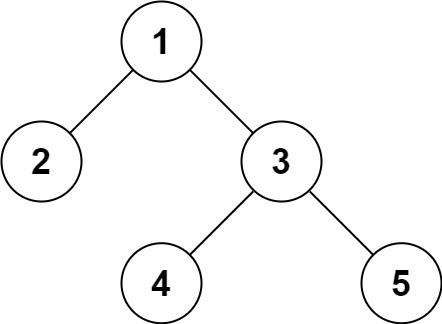


Input: root = [1,2,3,null,null,4,5]

Output: [1,2,3,null,null,4,5]


In [48]:
from typing import Optional, List

class Node:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Encode:
    def serialize(self, root: Optional[Node]) -> str:
        
        def preorder(node):
            if not node:
                return ["null"]
            return [str(node.val)] + preorder(node.left) + preorder(node.right)
        
        return ",".join(preorder(root))

    def deserialize(self, data: str) -> Optional[Node]:
        def build_tree(values):
            if not values:
                return None
            val = values.pop(0)
            if val == "null":
                return None
            node = Node(int(val))
            node.left = build_tree(values)
            node.right = build_tree(values)
            return node
        
        values = data.split(",")
        return build_tree(values)

In [49]:
# example
encode = Encode()

# [1, 2, 3, null, null, 4, 5]
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.right.left = Node(4)
root.right.right = Node(5)

# serialize
serialized = encode.serialize(root)
print("Serialized:", serialized)

# deserialize
deserialized = encode.deserialize(serialized)
print("Deserialized Root Value:", deserialized.val)

Serialized: 1,2,null,null,3,4,null,null,5,null,null
Deserialized Root Value: 1
